# <FONT SIZE=5 COLOR="purple"> **1. Modelo de Clasificación - Entrega Final Machine Learning** </FONT>

- Buscar un conjunto de datos (>2000 registros) al cuál se le pueda aplicar algoritmos de clasificación. Es decir, que busque predecir una variable con dos o más categorias.

- Explorar los datos

- Aplicar modelos: regresión logística, árboles de decisión y Random Forest

- Evaluar los modelos y seleccionar el mejor con la curva ROC.

- Hacer algunas predicciones.

# <FONT SIZE=5 COLOR="purple"> **1. Carga de los datos desde kaggle - Loan_approval_data_2025** </FONT>

Para este caso, vamos a usar los datos que se encuentrn en kaggle, en donde hay una serie de datos economicos donde se aprueban o no se aprueban creditos para compra de vivienda, el link se encuentra en [el siguiente enlace](https://www.kaggle.com/datasets/parthpatel2130/realistic-loan-approval-dataset-us-and-canada)

In [ ]:
import kagglehub
import os
import pandas as pd

In [ ]:
path = kagglehub.dataset_download("parthpatel2130/realistic-loan-approval-dataset-us-and-canada")
print(path)

Using Colab cache for faster access to the 'realistic-loan-approval-dataset-us-and-canada' dataset.
/kaggle/input/realistic-loan-approval-dataset-us-and-canada


In [ ]:
for f in os.listdir(path):
  print(f)

Loan_approval_data_2025.csv


In [ ]:
df_loan = pd.read_csv(path + "/Loan_approval_data_2025.csv")
df_loan.head()

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1
3,CUST100003,53,Student,0.5,29147,692,9.8,1480,11603,0,1,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1
4,CUST100004,32,Employed,12.5,63657,630,7.2,209,12424,0,0,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1


Para que la base de datos sea 100% funcional, vamos a eliminar de una vez la columna costumer id

In [ ]:
df_loan_final = df_loan.drop(columns=['customer_id'])
df_loan_final.head()

,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1
3,53,Student,0.5,29147,692,9.8,1480,11603,0,1,0,Credit Card,Business,2900,18.74,0.398,0.099,0.033,1
4,32,Employed,12.5,63657,630,7.2,209,12424,0,0,0,Personal Loan,Education,99600,13.92,0.195,1.565,0.522,1


# <FONT SIZE=5 COLOR="purple"> **CArga de las librerias necesariar** </FONT>

In [ ]:
# --- Librerías Principales (Datos y Gráficos) ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
import warnings
from itertools import cycle # Útil para gráficos ROC

# --- Gráficos Específicos (Árboles y Colores) ---
from graphviz import Source
from sklearn.tree import export_graphviz
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch

# --- Preprocesamiento y Herramientas de Datos ---
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, LabelEncoder,
                                   OneHotEncoder, label_binarize)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.datasets import load_iris

# --- Selección y Optimización de Modelos ---
from sklearn.model_selection import (train_test_split, GridSearchCV,
                                     RandomizedSearchCV)

# --- Modelos de Clasificación ---
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# --- Modelos de Regresión ---
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# --- Métricas de Evaluación ---
from sklearn import metrics
from sklearn.metrics import (
    # Métricas de Clasificación
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, roc_auc_score,

    # Métricas de Regresión
    mean_squared_error, r2_score, mean_absolute_error
)
from imblearn.metrics import specificity_score

# --- Configuración (Opcional) ---
# Para omitir los warnings
warnings.filterwarnings("ignore")

# <FONT SIZE=5 COLOR="purple"> **Exploración de los datos** </FONT>

In [ ]:
print("Los datos tienen " + str(df_loan_final.shape[0]) + " ovservaciones y " + str(df_loan_final.shape[1]) + " variables \n")

print(f"Los tipos de datos en las son las siguientes: \n{df_loan_final.dtypes} \n")

print("Verificamos si hay datos faltantes:")
print(df_loan_final.isna().sum(), "\n")

print("Ahora analizaremos sus estadísticas descriptivas:")
round(df_loan_final.describe(), 3)

Los datos tienen 50000 ovservaciones y 19 variables 

Los tipos de datos en las son las siguientes: 
age                          int64
occupation_status           object
years_employed             float64
annual_income                int64
credit_score                 int64
credit_history_years       float64
savings_assets               int64
current_debt                 int64
defaults_on_file             int64
delinquencies_last_2yrs      int64
derogatory_marks             int64
product_type                object
loan_intent                 object
loan_amount                  int64
interest_rate              float64
debt_to_income_ratio       float64
loan_to_income_ratio       float64
payment_to_income_ratio    float64
loan_status                  int64
dtype: object 

Verificamos si hay datos faltantes:
age                        0
occupation_status          0
years_employed             0
annual_income              0
credit_score               0
credit_history_years       0
savings_

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
count,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000
mean,34.957,7.455,50062.892,643.615,8.168,3595.619,14290.442,0.053,0.555,0.148,33041.874,15.499,0.286,0.702,0.234,0.550
std,11.119,7.612,32630.501,64.732,7.208,13232.399,13243.757,0.225,0.845,0.413,26116.185,4.068,0.160,0.466,0.155,0.497
min,18.000,0.000,15000.000,348.000,0.000,0.000,60.000,0.000,0.000,0.000,500.000,6.000,0.002,0.008,0.003,0.000
25%,26.000,1.300,27280.500,600.000,2.000,130.000,5581.000,0.000,0.000,0.000,12300.000,12.180,0.161,0.333,0.111,0.000
50%,35.000,4.900,41607.500,643.000,6.100,568.000,10385.000,0.000,0.000,0.000,26100.000,15.440,0.265,0.622,0.207,1.000
75%,43.000,11.400,62723.250,687.000,12.600,2271.000,18449.250,0.000,1.000,0.000,48500.000,18.870,0.389,1.010,0.337,1.000
max,70.000,39.900,250000.000,850.000,30.000,300000.000,163344.000,1.000,9.000,4.000,100000.000,23.000,0.800,2.001,0.667,1.000


**Diccionario de Variables**

- age: Edad del solicitante en años.
- years_employed: Años que el solicitante ha estado empleado.
- annual_income: Ingreso anual del solicitante.
- credit_score: Puntaje crediticio del solicitante.
- credit_history_years: Años de historial crediticio del solicitante.
- savings_assets: Valor total de los ahorros o activos líquidos del solicitante.
current_debt: Valor total de la deuda actual del solicitante.
- defaults_on_file: Número de incumplimientos o defaults registrados en el historial crediticio.
- delinquencies_last_2yrs: Número de moras o pagos atrasados en los últimos dos años.
- derogatory_marks: Número de marcas negativas severas en el historial crediticio (como cobranzas o quiebras).
- loan_amount: Monto solicitado del préstamo.
interest_rate: Tasa de interés aplicada al préstamo.
- debt_to_income_ratio: Relación entre la deuda total del solicitante y su ingreso.
- loan_to_income_ratio: Relación entre el monto del préstamo solicitado y el ingreso anual del solicitante.
- payment_to_income_ratio: Proporción del pago del préstamo respecto al ingreso del solicitante.
- loan_status: Estado final del préstamo (por ejemplo, aprobado o rechazado).


Gracias a la tabla anterior y el diccionario de variavles, aqui podemos ver que las solicitudes de creditos que solo se le hacen a personas que se encuentren entre los 18 y 70 años. Se tiene una media de 7 años empleado y un ingreso medio de 32000, con un historial crediticio de 8 añños con muchas variaciones y con un score promedio de 643 puntos.

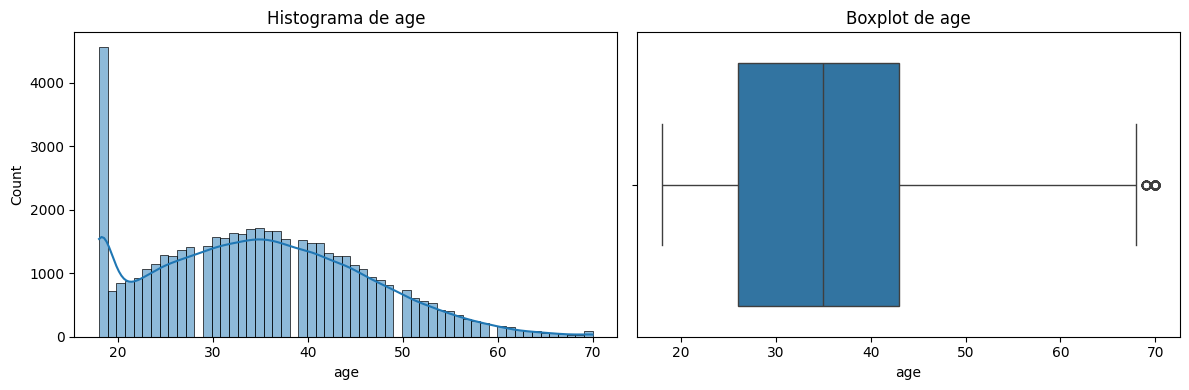

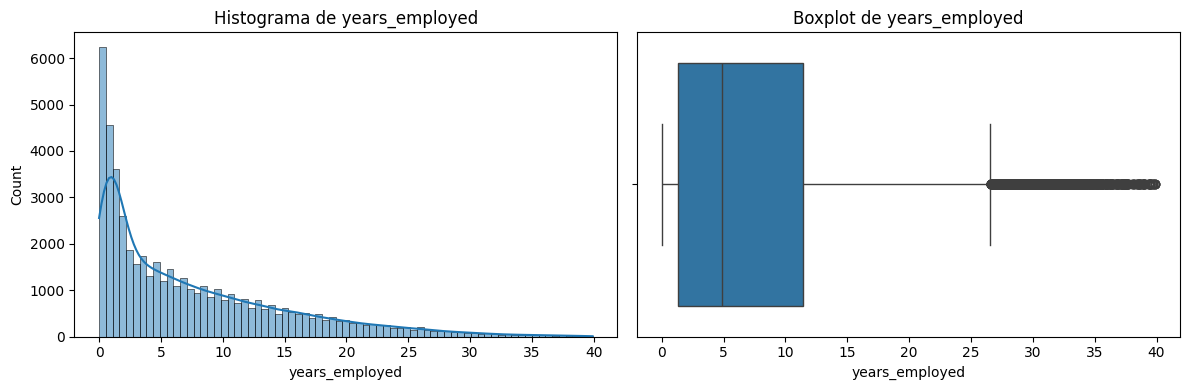

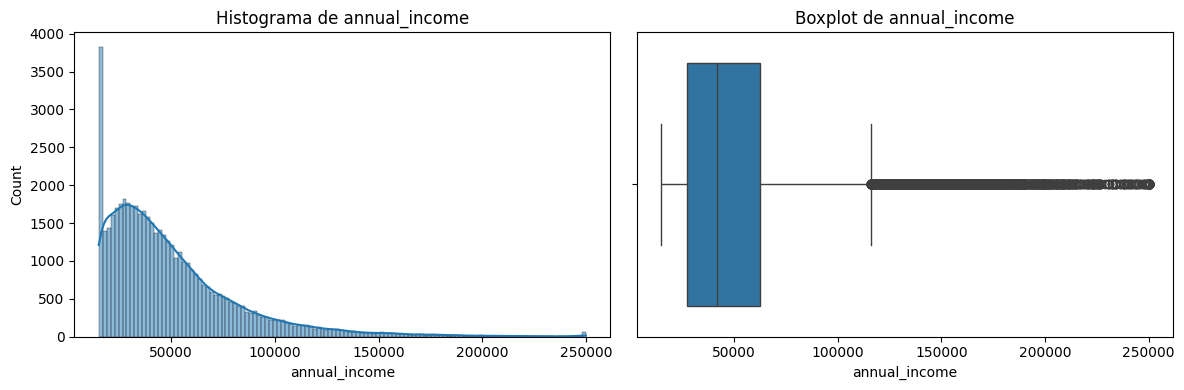

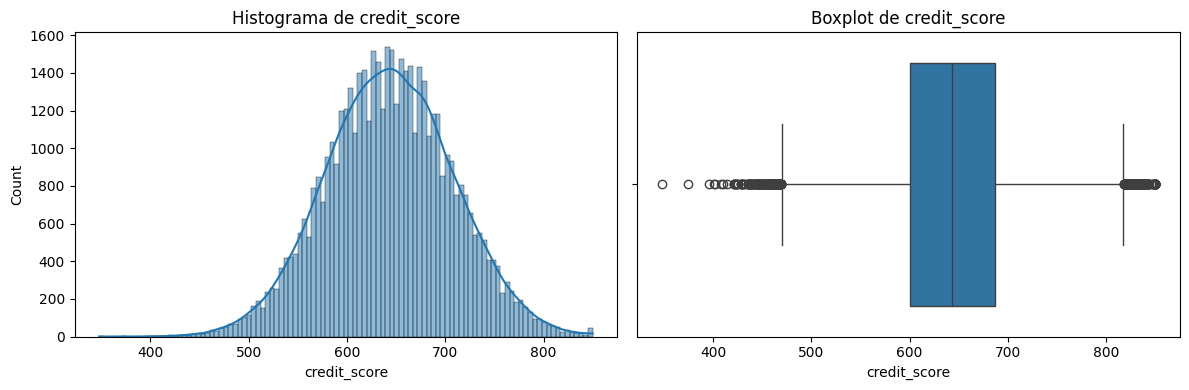

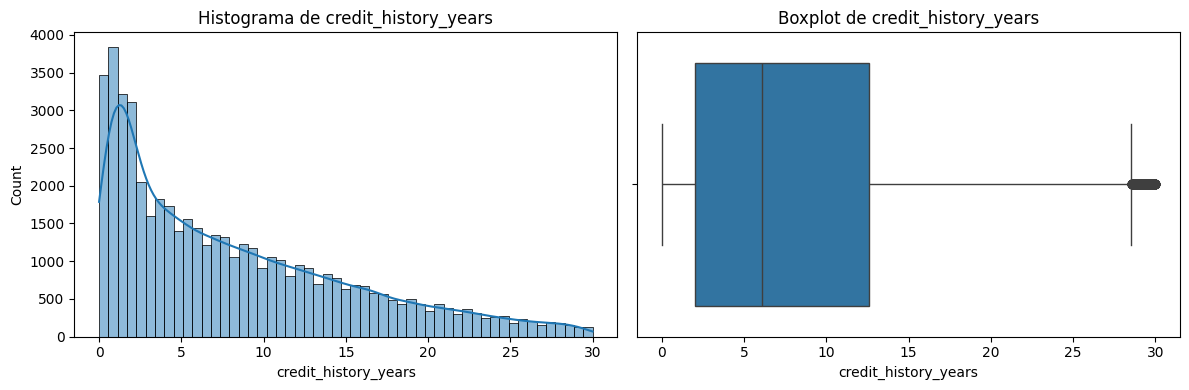

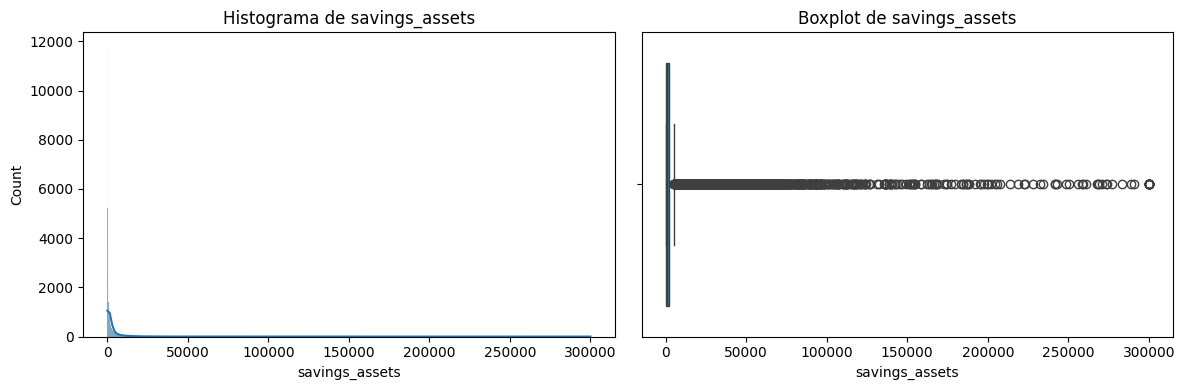

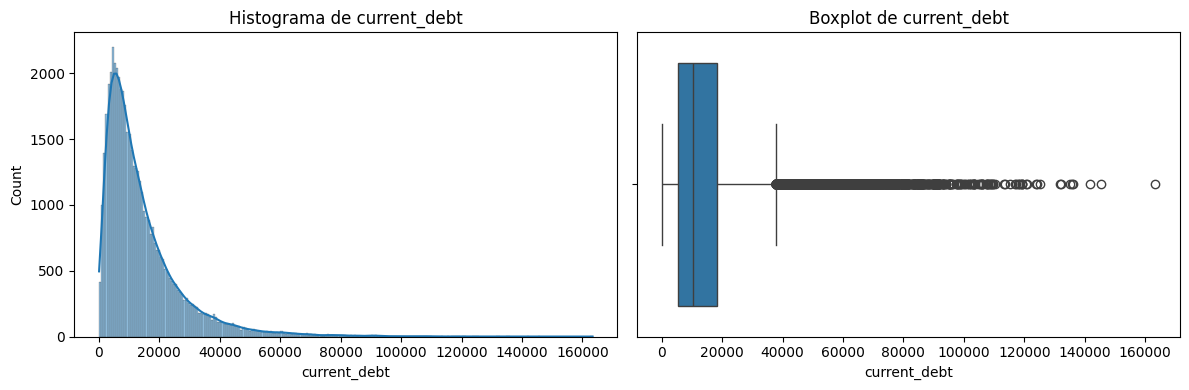

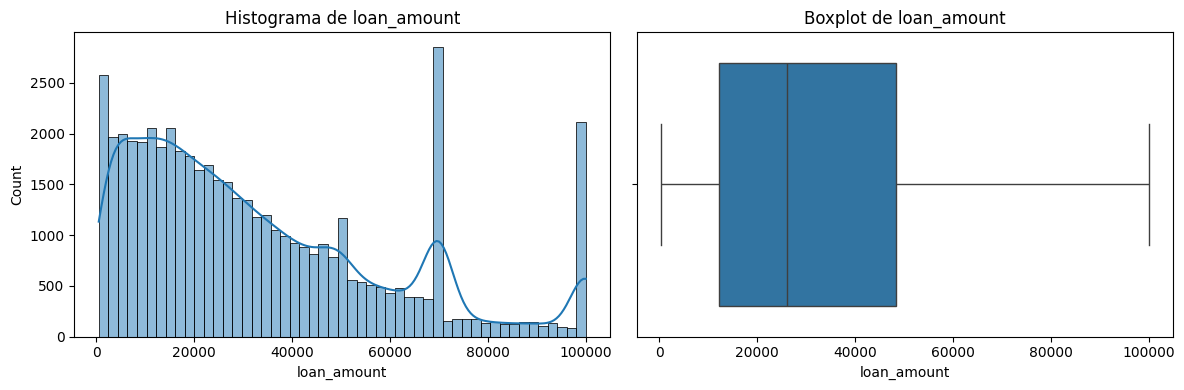

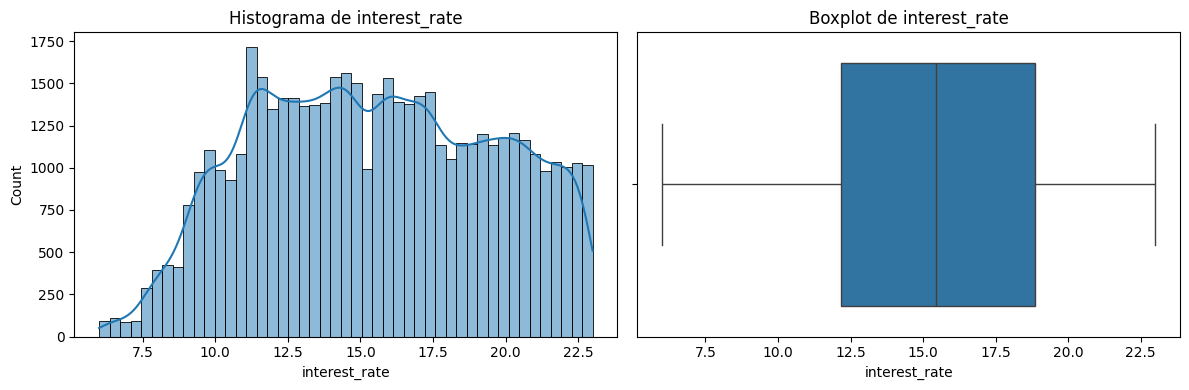

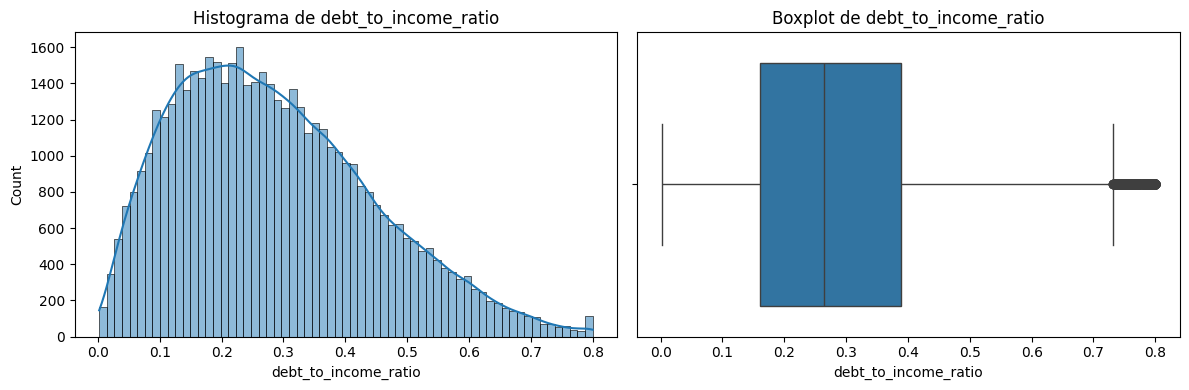

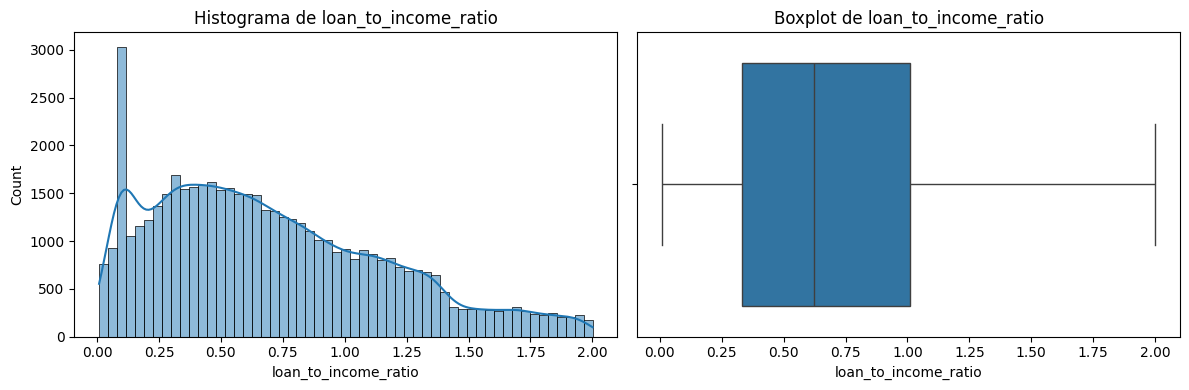

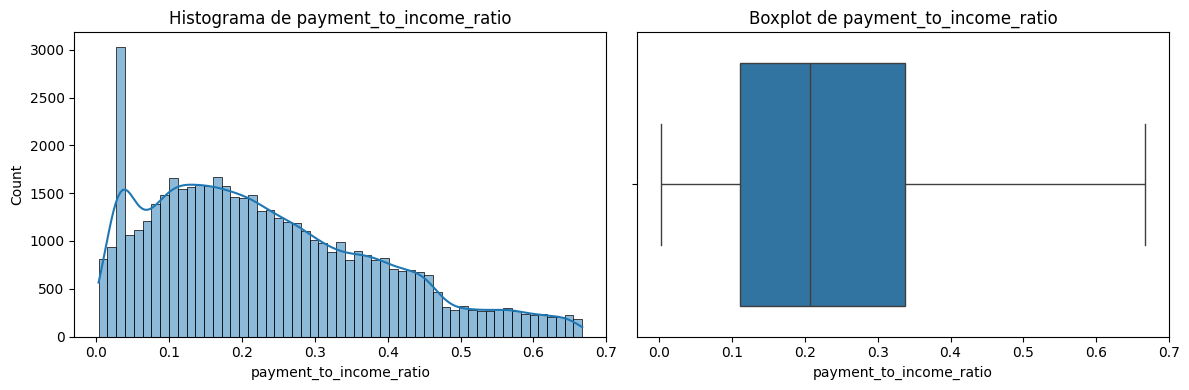

In [ ]:
datos_p1_graficas = df_loan_final.drop(["loan_status", "defaults_on_file", "delinquencies_last_2yrs", "derogatory_marks"], axis = 1)

for col in datos_p1_graficas.select_dtypes(include=np.number).columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(datos_p1_graficas[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histograma de {col}')

    sns.boxplot(x=datos_p1_graficas[col], ax=axes[1])
    axes[1].set_title(f'Boxplot de {col}')

    plt.tight_layout()
    plt.show()
    print("\n")


Aqui excuiimos la variable "loan_status", "defaults_on_file", "delinquencies_last_2yrs"y "derogatory_marks" ya que estas son variables categoricas, no vamos a poderla analizar como si fuera numerica, y su histograma solo se van a ver dos barras, una en 1 y la otra en 0 o sus categorias respectivas que se ven como numeros

Podemos ver que la variable edad tiene una forma muy similar a la normal, pero esta tienen un pico de solicitudes de créditos en una temprana edad, antes de los 20 años con mas de 4000 aplicaciones, además esta se encuenta un poco sesgada a la derecha, ya que tiene unos datos atípicos ahi. la empeabilidad en años tiene un sesgo a cola derecha, ya que se ve que la mayoría de observaciones se encuentran en los primeros 10 años. Lo cual puede sugerir que las personas son nuevas en el mundo laboral. Para el inngreso anual se puede ver un pico en el inicio del histograma, en donde puede ayudarnos a intuir que este es el salario de los jovenes que tienen mas solicitudes de crédito, esta Tambien cuenta con un sesgo a cola derecha, y cuenta con un ingreso maximo de 250000 usd al año.

Para el historial crediticio, podemos ver que este es muy similar a la forma de una campana de gauss, por lo que podemos decir que es la que mas normalidad tiene de todas. Se puede ver que tanto para la dauda actual y para los ahorros hay valores muy bajos, por lo que se puede concluir que las personas no cuentan casi con ahorros o con una vida creditica con deudas en su mayoría. Por otro lado, podemos ver el índice de ingres vs deuda, que la media se encuentra por detrás del 30%, lo cual es bueno, pero por otro lado hay personas que destinan el 80% de sus ingresos en el pago de estas deudas.

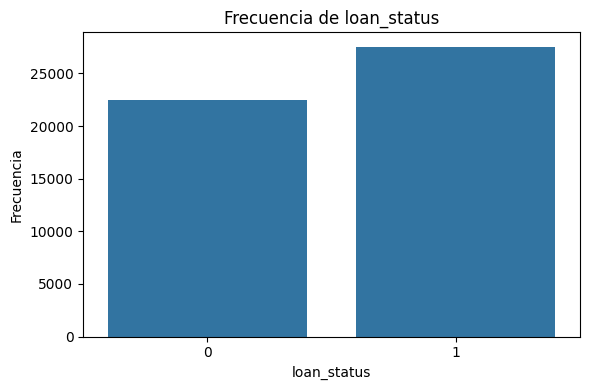

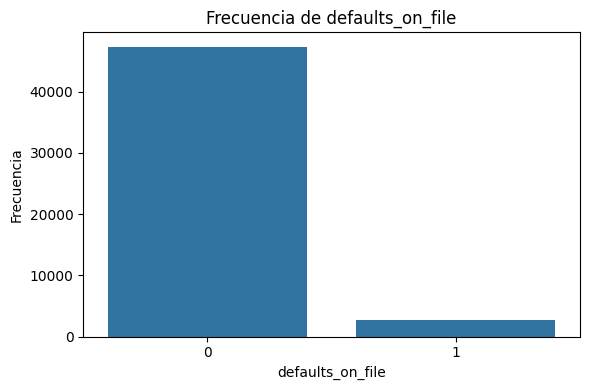

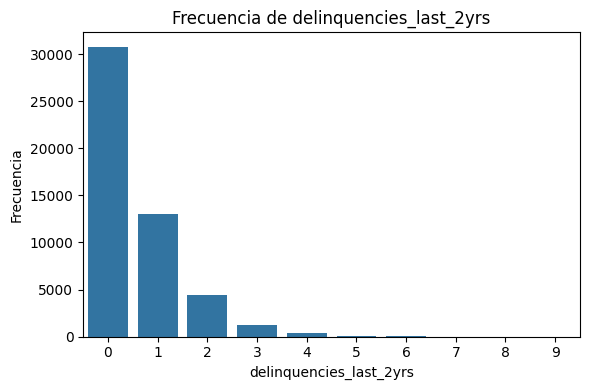

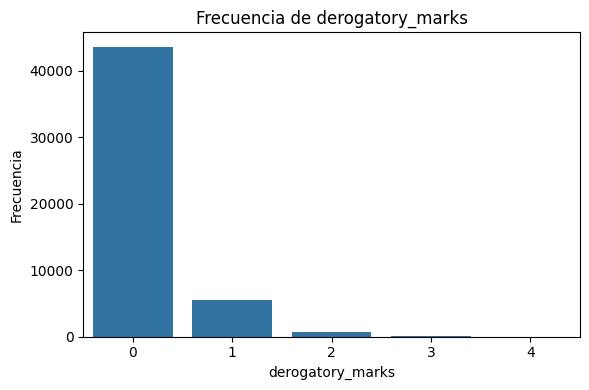

In [ ]:
vars_freq = ["loan_status", "defaults_on_file", "delinquencies_last_2yrs", "derogatory_marks"]

for col in vars_freq:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df_loan_final[col])
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()
    print("\n")


Analizando las figuras de frecuencias, se puede evidenciar que son mas los prestamos aprobados que los desaprobados, con una diferencia aproximada de 50000 observaciones. la Mayoria no cuenta con incumplimientos en el historial de crédito, no cuenta con moras o marcas negativas severas en el historial. No obstante, se ven ciertos comportamientos negativos en términos economicos en algunas observaciones.

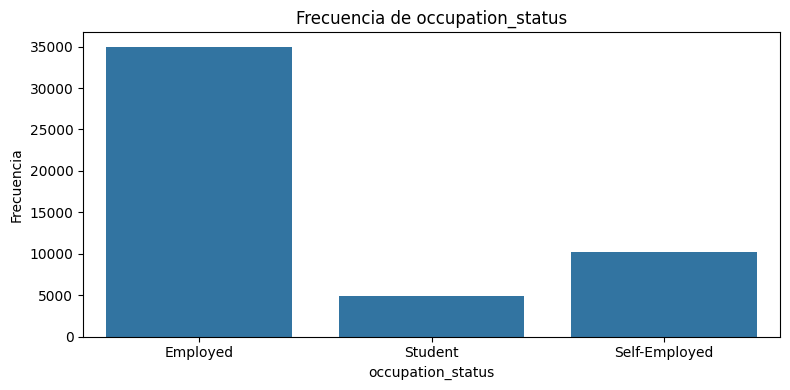

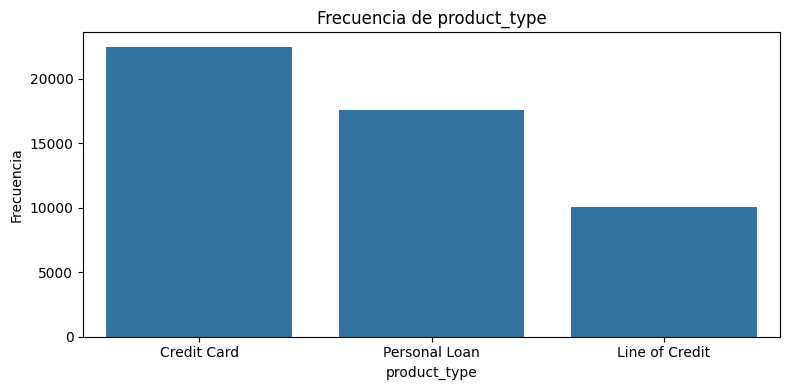

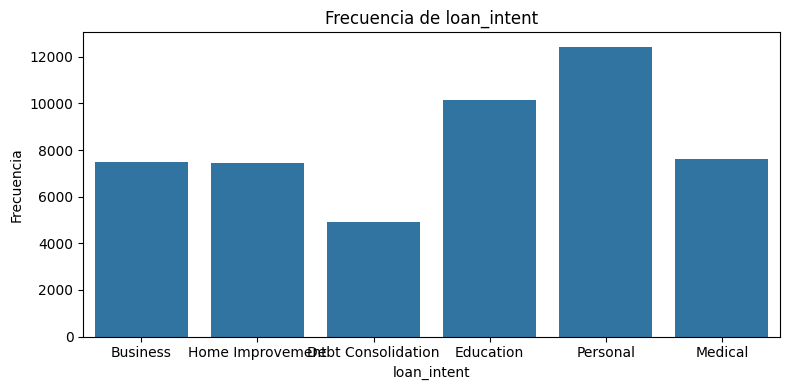

In [ ]:
vars_obj = df_loan_final.select_dtypes(include="object").columns

for col in vars_obj:
    plt.figure(figsize=(8,4))
    sns.countplot(x=df_loan_final[col])
    plt.title(f'Frecuencia de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()
    print("\n")

En las ultimas graficas de frecuencia, podermos ver que que la mayoría son empleados de alguna compañía o trabajo con un empleador, después hay auto empleados y por últimos y con menos frecuencia, hay estudiantes. La mayoría de créditos son para sacar una tarjeta de crédito. Y por ultimose ven que los créditos son usados para beneficio u ocio propio, ya que su intención de prestamos en su mayoría son uso personal, mejorar su casa. Y por otro lado hay créditos que se piden para usos medicos y educacionales.

# <FONT SIZE=5 COLOR="purple"> **Aplicación de Modelos** </FONT>

Vamos a predecir la variable "loan_status", la cual es si le aprobaron o no el credito a determinada persona, esto lo vamos a hacer gracias a la información económica que tenemos de cada ovservacion. Primero vamos a hacer la division de la base en entrenamiento y prueba

In [ ]:
objetivo = 'loan_status'
lista_resultados = []

try:
    X = df_loan_final.drop(objetivo, axis=1)
    y = df_loan_final[objetivo]
except KeyError:
    print(f"Error: No se encontró la columna '{objetivo}' en datos_p1.")

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

In [ ]:
variables_num = X_train.select_dtypes(include=np.number).columns.tolist()
variables_cat = X_train.select_dtypes(include='object').columns.tolist()

preprocesador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_num),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), variables_cat)
    ],
    remainder='passthrough'
)

X_train_transformado = preprocesador.fit_transform(X_train)
X_test_transformado = preprocesador.transform(X_test)

nombres_transformados = (
    variables_num +
    list(preprocesador.named_transformers_['cat'].get_feature_names_out(variables_cat))
)

df_transformado = pd.DataFrame(
    X_train_transformado,
    columns=nombres_transformados
)


In [ ]:

lista_resultados = []

modelos_con_escalado_seleccionados = [
    ('Regresión Logística', LogisticRegression(max_iter=1000, random_state=42)),
]

for nombre, modelo in modelos_con_escalado_seleccionados:
    pipeline = Pipeline([
        ('preprocessor', preprocesador),
        ('classifier', modelo)
    ])

    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)

    reporte = classification_report(y_test, y_pred, output_dict=True)

    lista_resultados.append({
        'Modelo': nombre,
        'Objeto Modelo': pipeline,  # <-- ¡Guardamos el Pipeline/Modelo entrenado!
        'y_proba': y_proba,         # <-- ¡Guardamos la probabilidad!
        'Accuracy': reporte['accuracy'],
        'Precision (Macro)': reporte['macro avg']['precision'],
        'Recall (Macro)': reporte['macro avg']['recall'],
        'F1-Score (Macro)': reporte['macro avg']['f1-score']
    })

modelos_sin_escalado_seleccionados = [
    ('Árbol de Decisión', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42))
]

for nombre, modelo in modelos_sin_escalado_seleccionados:
    modelo.fit(X_train_transformado, y_train)

    y_pred = modelo.predict(X_test_transformado)
    y_proba = modelo.predict_proba(X_test_transformado) # <-- Obtenemos la probabilidad

    reporte = classification_report(y_test, y_pred, output_dict=True)

    lista_resultados.append({
        'Modelo': nombre,
        'Objeto Modelo': modelo,
        'y_proba': y_proba,
        'Accuracy': reporte['accuracy'],
        'Precision (Macro)': reporte['macro avg']['precision'],
        'Recall (Macro)': reporte['macro avg']['recall'],
        'F1-Score (Macro)': reporte['macro avg']['f1-score']
    })

tabla_comparativa = pd.DataFrame(lista_resultados)


tabla_metricas = tabla_comparativa.drop(columns=['Objeto Modelo', 'y_proba'])
tabla_metricas = tabla_metricas.sort_values(by='F1-Score (Macro)', ascending=False)
tabla_metricas = tabla_metricas.reset_index(drop=True)

display(tabla_metricas)

,Modelo,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro)
0,Random Forest,0.913667,0.912993,0.912472,0.912724
1,Árbol de Decisión,0.874733,0.873402,0.873532,0.873466
2,Regresión Logística,0.868067,0.867010,0.866158,0.866558


Tenemos que el mejor modelo es randim forest con un 0.91 de Acurrancy, Precision, Recall y F1-Score. No obstante, no se encuentra muy lejos el modelo de arbol de decisión

# <FONT SIZE=5 COLOR="purple"> **Selección y evaluación de los Modelos** </FONT>

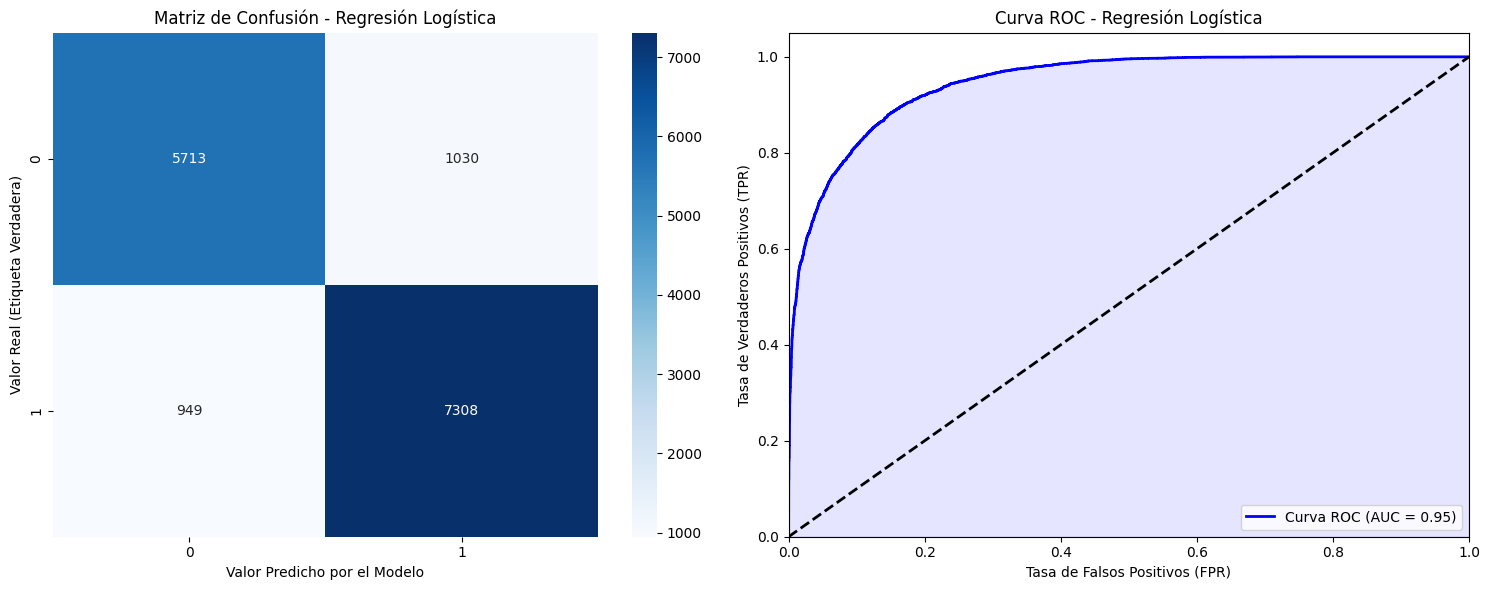

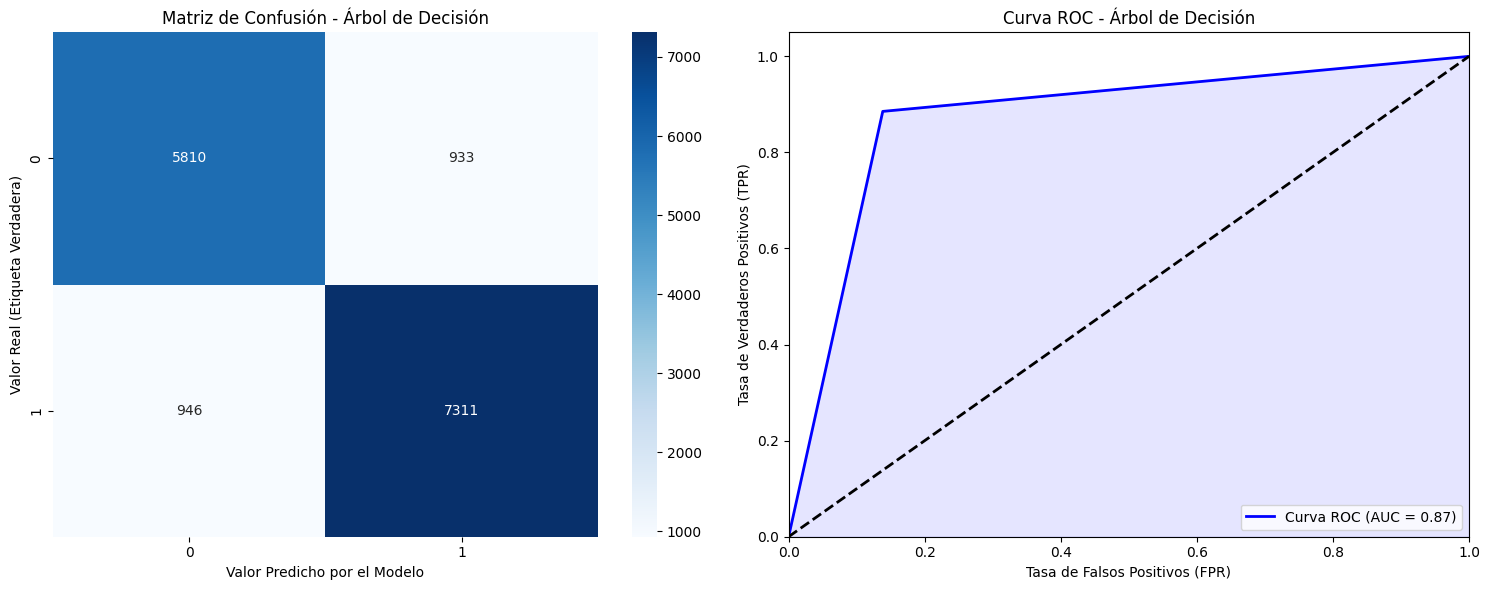

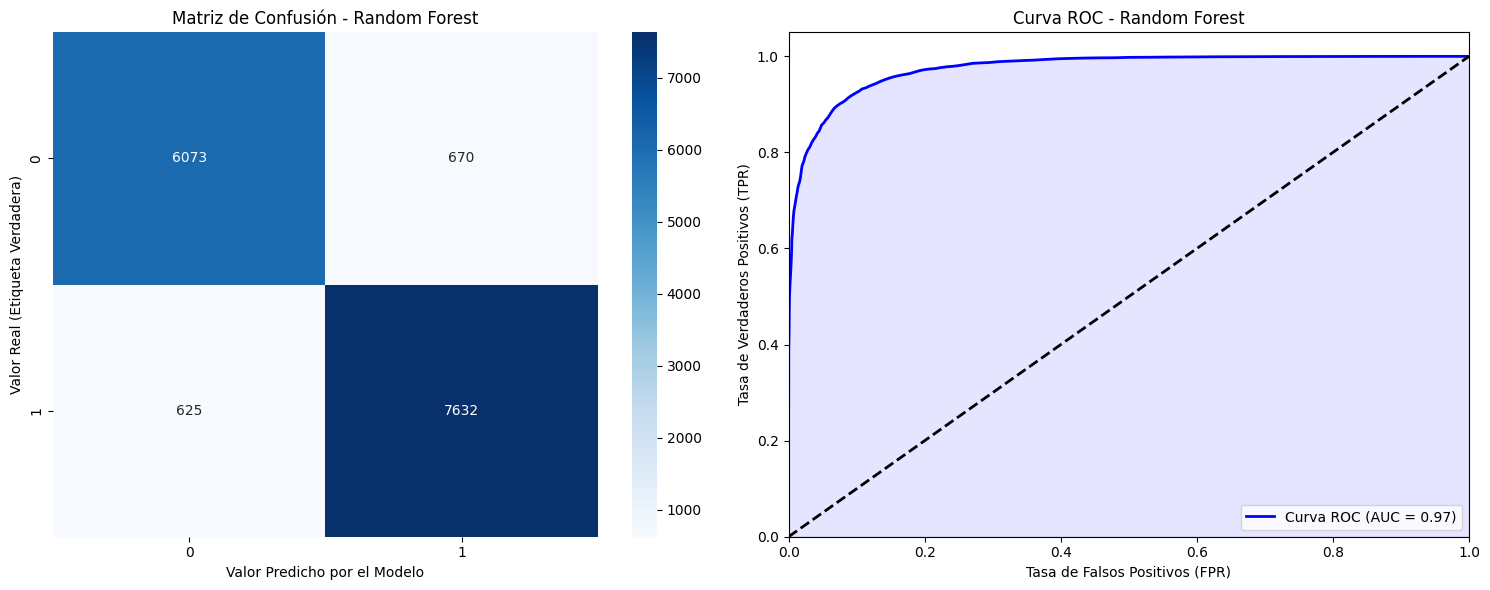

In [ ]:
clases = np.unique(y_test)
n_clases = len(clases)

y_test_binarizado = label_binarize(y_test, classes=clases)

for index, fila in tabla_comparativa.iterrows():

    nombre = fila['Modelo']
    y_proba = fila['y_proba']

    y_pred = np.where(y_proba[:, 1] > 0.5, 1, 0)

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    matriz = confusion_matrix(y_test, y_pred)
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues',
                xticklabels=clases,
                yticklabels=clases,
                ax=axes[0])

    axes[0].set_title(f'Matriz de Confusión - {nombre}')
    axes[0].set_ylabel('Valor Real (Etiqueta Verdadera)')
    axes[0].set_xlabel('Valor Predicho por el Modelo')

    if n_clases == 2:
        fpr, tpr, _ = roc_curve(y_test_binarizado, y_proba[:, 1])
        roc_auc = auc(fpr, tpr)

        axes[1].plot(fpr, tpr, color='blue', lw=2,
                     label=f'Curva ROC (AUC = {roc_auc:.2f})')

        axes[1].fill_between(fpr, tpr, 0, alpha=0.1, color='blue')

    axes[1].plot([0, 1], [0, 1], 'k--', lw=2)

    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('Tasa de Falsos Positivos (FPR)')
    axes[1].set_ylabel('Tasa de Verdaderos Positivos (TPR)')
    axes[1].set_title(f'Curva ROC - {nombre}')
    axes[1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()
    print("\n")

Dado que el AUC del modelo de Random Forest es el mayor con un 0.97. Entonces tenemos que este es el mejor modelo que podemos usar para clasificar el problema antes presentado

# <FONT SIZE=5 COLOR="purple"> **Predicciones** </FONT>

In [ ]:
mejor_modelo_fila = tabla_comparativa.loc[tabla_comparativa['F1-Score (Macro)'].idxmax()]

mejor_modelo = mejor_modelo_fila['Objeto Modelo']
nombre_mejor_modelo = mejor_modelo_fila['Modelo']



indices_muestra = X_test.sample(5, random_state=42).index
valores_reales = y_test.loc[indices_muestra]

muestras_prueba_original = X_test.loc[indices_muestra]
muestras_prueba = preprocesador.transform(muestras_prueba_original)


# Realizar la predicción
predicciones = mejor_modelo.predict(muestras_prueba)

comparativa = pd.DataFrame({
    'Valor Real (y_test)': valores_reales,
    'Valor Predicho': predicciones,
})

print("\n Predicciones ejemplo:")
print(comparativa)

print("\n Observacion")
for indices in indices_muestra:
    print(f"sujeto {indices}")
    print(df_loan_final.iloc[indices], "\n")


 Predicciones ejemplo:
       Valor Real (y_test)  Valor Predicho
16485                    0               0
12172                    0               0
19206                    0               0
6729                     1               1
11611                    1               1

 Observacion
sujeto 16485
age                                        21
occupation_status                    Employed
years_employed                            0.7
annual_income                           22372
credit_score                              605
credit_history_years                      0.9
savings_assets                              9
current_debt                             5432
defaults_on_file                            0
delinquencies_last_2yrs                     4
derogatory_marks                            0
product_type                   Line of Credit
loan_intent                Debt Consolidation
loan_amount                             18100
interest_rate                            12.5
d

Vemos 5 tomas random y la prediccion que esta hace, y vemos que no hay errores en la clasificacion, por lo que si tiene sentido el 90% de efectividad y el valor de la curva roc tan alto. Ahora, vamos a hacer la prediccion de sujetos inventados a continuación.

In [ ]:
import pandas as pd

datos_inventados_nuevos = {
    'age': [20, 45],
    'occupation_status': ['Unemployed', 'Employed'],
    'years_employed': [0.0, 20.0],
    'annual_income': [10000, 150000],
    'credit_score': [650, 800],
    'credit_history_years': [0.5, 25.0],
    'savings_assets': [500, 50000],
    'current_debt': [0, 10000],
    'defaults_on_file': [0, 0],
    'delinquencies_last_2yrs': [0, 0],
    'derogatory_marks': [0, 0],
    'product_type': ['Credit Card', 'Line of Credit'],
    'loan_intent': ['Personal', 'Business'],
    'loan_amount': [500, 100000],
    'interest_rate': [18.0, 6.5],
    'debt_to_income_ratio': [0.0, 0.067],
    'loan_to_income_ratio': [0.05, 0.67],
    'payment_to_income_ratio': [0.05, 0.04]
}

df_nuevos_casos = pd.DataFrame(datos_inventados_nuevos)

df_nuevos_casos.head(2)

,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio
0,20,Unemployed,0.0,10000,650,0.5,500,0,0,0,0,Credit Card,Personal,500,18.0,0.000,0.05,0.05
1,45,Employed,20.0,150000,800,25.0,50000,10000,0,0,0,Line of Credit,Business,100000,6.5,0.067,0.67,0.04


- Estudiante: Se trata de un individuo de 20 años clasificado como Desempleado con solo 0.5 años de historial crediticio. Sus ingresos anuales son bajos ($10,000), y solicita una cantidad menor de crédito ($500) con la intención de obtener una Tarjeta de Crédito personal. Su puntaje crediticio de 650 es regular, y la alta tasa de interés asociada al perfil (18.0%) refleja el riesgo percibido por la falta de un historial laboral y de crédito significativo.

- Empresario: Este sujeto es un profesional de 45 años que está Empleado con 20 años de experiencia laboral y 25 años de historial crediticio. Muestra una excelente salud financiera, con un ingreso anual muy alto ($150,000) y un puntaje crediticio de 800. A pesar de solicitar una línea de crédito sustancial ($100,000) para fines comerciales, su baja relación deuda-ingreso y la tasa de interés muy favorable (6.5%) lo posicionan como un solicitante de muy bajo riesgo y alta capacidad de pago.

In [ ]:
mejor_modelo_fila = tabla_comparativa.loc[tabla_comparativa['F1-Score (Macro)'].idxmax()]
mejor_modelo = mejor_modelo_fila['Objeto Modelo']
nombre_mejor_modelo = mejor_modelo_fila['Modelo']

df_nuevos_casos = pd.DataFrame(datos_inventados_nuevos)

X_nuevos_a_predecir = preprocesador.transform(df_nuevos_casos)

predicciones_inventadas = mejor_modelo.predict(X_nuevos_a_predecir)

print(f"--- Resultados de la Simulación (Modelo: {nombre_mejor_modelo}) ---")
resultados = {
    0: "0 (DESAPROBADO / RIESGO)",
    1: "1 (APROBADO / SEGURO)"
}

for i, prediccion in enumerate(predicciones_inventadas):
    caso = "Estudiante (Baja Capacidad)" if i == 0 else "Empresario (Alta Capacidad)"
    resultado_texto = resultados.get(prediccion, "Clase Desconocida")

    print(f"Caso {i+1} [{caso}]: El modelo predice {resultado_texto}")

--- Resultados de la Simulación (Modelo: Random Forest) ---
Caso 1 [Estudiante (Baja Capacidad)]: El modelo predice 1 (APROBADO / SEGURO)
Caso 2 [Empresario (Alta Capacidad)]: El modelo predice 1 (APROBADO / SEGURO)


In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done


In [ ]:
!jupyter nbconvert --to PDF /content/drive/MyDrive/Modelo_Clasificación_MCG.ipynb
